In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Given a system of linear equations:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n &= b_1 \\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n &= b_2 \\
\vdots \quad \quad \quad \quad \quad &= \vdots \\
a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n &= b_m
\end{aligned}
$$

This is equivalent to writing **$A\mathbf{x} = \mathbf{b}$**, where:
$$
A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix} \in \mathbb{R}^{m \times n}
$$
$$
x = \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix} \in \mathbb{R}^n
$$
$$
b = \begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{pmatrix} \in \mathbb{R}^m
$$

If $A$ is **square** ($m = n$) and **invertible**, we can solve:

$$\mathbf{x} = A^{-1}\mathbf{b}$$

In [ ]:
# System: 
# 170x1 + 25x2 + x3 = 7
# 180x1 + 30x2 + x3 = 8
# 200x1 + 35x2 + x3 = 12

A = np.array([
    [170, 25, 1],
    [180, 30, 1],
    [200, 35, 1]
])
b = np.array([7, 8, 12])

x = np.linalg.inv(A) @ b
x

array([  0.3,  -0.4, -34. ])

In [62]:
# solve() (more numerically stable)
x = np.linalg.solve(A, b)
x

array([  0.3,  -0.4, -34. ])

- $A$ is not square → $A^{-1}$ **doesn't exist**
- We have **more observations than features** ($m > n$)

In [ ]:
# System: 
# 170x1 + 25x2 + x3 = 7
# 180x1 + 30x2 + x3 = 8
# 200x1 + 35x2 + x3 = 12
# 160x1 + 20x2 + x3 = 15

A = np.array([
    [170, 25, 1],
    [180, 30, 1],
    [200, 35, 1],
    [160, 20, 1],
])
b = np.array([7, 8, 12, 15])

x = np.linalg.inv(A) @ b
x

LinAlgError: Last 2 dimensions of the array must be square

to find $\mathbf{x}$ we need to minimize $f(\mathbf{x}) = \| A\mathbf{x} - \mathbf{b} \|$

$$
\begin{aligned}
f(x) &= \|Ax - b\|^2 \\
&= (Ax - b)^T (Ax - b) \\
&= (x^T A^T - b^T)(Ax - b) \\
&= x^T A^T Ax - x^T A^T b - b^T Ax + b^T b \\
&= x^T A^T Ax - 2b^T Ax + b^T b 
\end{aligned}
$$

Derivative rules can be applied
$$
\begin{aligned}
\frac{\partial}{\partial x} a^{T}x &= a \\
\frac{\partial}{\partial x} x^{T}Ax &= (A + A^T)x
\end{aligned}
$$

Taking the derivative and setting to zero:
$$
\begin{aligned}
\frac{\partial f}{\partial x} &= \frac{\partial}{\partial x} (x^T A^T Ax - 2b^T Ax + b^T b) \\
&= 2A^T Ax - 2A^T b \\
&= 0
\end{aligned}
$$

So we must have 
$$\begin{aligned}
A^TA\mathbf{x} &= A^T\mathbf{b} \\
\mathbf{x} &= (A^TA)^{-1}A^T\mathbf{b} \quad \text{(if } A^TA \text{ is invertible)}
\end{aligned}$$

In [ ]:
# System: 
# 170x1 + 25x2 + x3 = 7
# 180x1 + 30x2 + x3 = 8
# 200x1 + 35x2 + x3 = 12
# 160x1 + 20x2 + x3 = 15

A = np.array([
    [170, 25, 1],
    [180, 30, 1],
    [200, 35, 1],
    [160, 20, 1],
])
b = np.array([7, 8, 12, 15])

x = np.linalg.pinv(A) @ b
x

array([  0.9,  -2.5, -80.5])

**Problems with $(A^TA)^{-1}A^T\mathbf{b}$:**

1. High Computational Cost for inverting $A^TA$
2. $A^TA$ can be **ill-conditioned** (nearly singular). Small changes in data → huge changes in solution
3. Need to store $n \times n$ matrix

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(A[:, :-1], b)
lin_reg.intercept_, lin_reg.coef_

(np.float64(-80.50000000000003), array([ 0.9, -2.5]))

# Gradient descent


Instead of computing the inverse, **iteratively update** parameters to minimize the cost function.

**Cost Function (MSE)**:
$$J(\mathbf{x}) = \frac{1}{2m} \|\mathbf{b} - A\mathbf{x}\|^2$$

Where $m$ is the size of sample

### The Gradient

$$\begin{aligned}
\nabla J(\mathbf{x}) &= \frac{\partial J}{\partial \mathbf{x}}  \\
 &= \frac{\partial}{\partial \mathbf{x}} \left( \frac{1}{2m} \|\mathbf{b} - A\mathbf{x}\|^2 \right) \\ 
 &= \frac{1}{2m} \frac{\partial}{\partial \mathbf{x}} \|\mathbf{b} - A\mathbf{x}\|^2 \\ 
 &= -\frac{1}{m} A^T(\mathbf{b} - A\mathbf{x}) \\
&= \frac{1}{m} A^T(A\mathbf{x} - \mathbf{b})
\end{aligned}$$

### Update Rule

$$\mathbf{x} := \mathbf{x} - \eta \ \nabla J(\mathbf{x})$$

Where $\eta$ is the **learning rate**.


### Why Gradient Descent?

| Aspect | Normal Equation | Gradient Descent |
|--------|----------------|------------------|
| Complexity | $O(n^3)$ | $O(k \cdot m \cdot n)$ |
| Features | Works for small $n$ | Scales to large $n$ |
| Inversion | Required | Not needed |
| Learning Rate | N/A | Need to tune $\alpha$ |
| Iterations | 1 (closed-form) | Many |

---

In [158]:
import numpy as np

rng = np.random.default_rng(seed=42)
m = 200  # number of instances
X = 2 * rng.random((m, 2))  # column vector
y = 4 + 3 * X + rng.standard_normal((m, 1))  # column vector

X.shape, y.shape

((200, 2), (200, 2))

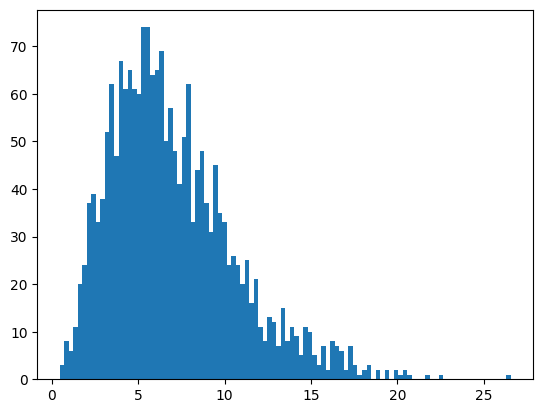

In [126]:
rng = np.random.default_rng(seed=42)
m = 2000  # number of instances

boylar = rng.normal(175, 10, size=(m,1))
yashlar = rng.uniform(18, 60, size=(m,1))
# maashlar = rng.exponential(scale=4, size=(m,1))
# maashlar = rng.chisquare(df=6, size=(m,1))
maashlar = rng.gamma(shape=3.5, scale=2, size=(m,1))

plt.hist(maashlar, bins=100)
plt.show()

In [162]:
from sklearn.preprocessing import add_dummy_feature

X = np.hstack([boylar/100, yashlar/100])
X_b = add_dummy_feature(X)
# X_b = np.c_[X, np.ones((m, 1))]

y = maashlar/10

X_b, y

(array([[1.        , 1.78047171, 0.19778537],
        [1.        , 1.64600159, 0.36687386],
        [1.        , 1.82504512, 0.40973487],
        ...,
        [1.        , 1.740846  , 0.23681841],
        [1.        , 1.69691782, 0.56835309],
        [1.        , 1.97141526, 0.38183515]], shape=(2000, 3)),
 array([[0.61006609],
        [0.64261833],
        [0.39956131],
        ...,
        [0.39419609],
        [1.47388686],
        [0.21100565]], shape=(2000, 1)))

## Batch Gradient Descent

In [172]:
eta = 0.1  # learning rate
n_epochs = 30000
m = len(X_b)  # number of instances

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((3, 1))  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 1 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    
theta

array([[ 0.70714298],
       [ 0.01070541],
       [-0.06718738]])

In [173]:
X_test = np.array([
    [1.        , 1.75, 0.35]
])

X_test @ theta

array([[0.70236187]])

**Pros**: Stable convergence  
**Cons**: Slow for large datasets

## Stochastic Gradient Descent

In [175]:
n_epochs = 100
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((3, 1))  # randomly initialized model parameters

for epoch in range(n_epochs):
    for iteration in range(m):

        random_index = rng.integers(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)  # learning rate
        theta = theta - eta * gradients

theta

array([[ 0.77150148],
       [-0.07764057],
       [ 0.16762074]])

In [219]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=10000, 
    # tol=1e-5, 
    penalty=None, 
    eta0=0.1,
    n_iter_no_change=1000, 
    random_state=42
)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.intercept_, sgd_reg.coef_

(array([0.7144053]), array([ 0.02406006, -0.06317182]))

**Pros**: Fast, can escape local minima  
**Cons**: Noisy, never truly converges

## Mini-batch gradient descent

In [225]:
# extra code – this cell generates Figure 4–11

from math import ceil

n_epochs = 1000
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((3, 1))  # randomly initialized model parameters

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = rng.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
        theta = theta - eta * gradients

theta

array([[ 0.70797365],
       [ 0.01056922],
       [-0.06719565]])

**Pros**: Best of both worlds (stable + efficient)  
**Cons**: Extra hyperparameter (batch size)